In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from collections import Counter

In [11]:
df_datetime= pd.read_csv('MyDataset_12_twice.csv')

In [12]:
df_datetime.head()

,login,mounth,year,failCount,failPause,failMax,lifeTime,activeLife,calls,rejectedCalls,...,addItv,gender,payments,paymentType,paymentSum,serviceTask,lk,bigFailure,sms,outflow
0,afvpn3123,3,2021,3,29760,29460,75368162,72642553,0,0,...,0,1,2,6,1085,0,0,0,2,0
1,afvpn3331,3,2021,7,32820,30060,151481621,146966400,1,1,...,0,0,2,6,1300,0,0,0,2,0
2,afvpn3447,3,2021,1,360,360,99732809,55036800,0,0,...,0,1,0,0,0,0,0,0,0,0
3,afvpn3595,3,2021,3,51960,39160,154685621,155088000,3,1,...,0,1,2,6,1400,0,0,0,2,0
4,afvpn3615,3,2021,3,51900,39101,154690459,155088000,8,2,...,0,0,0,0,0,5,0,0,8,0


/tmp/ipykernel_3338/3865711354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


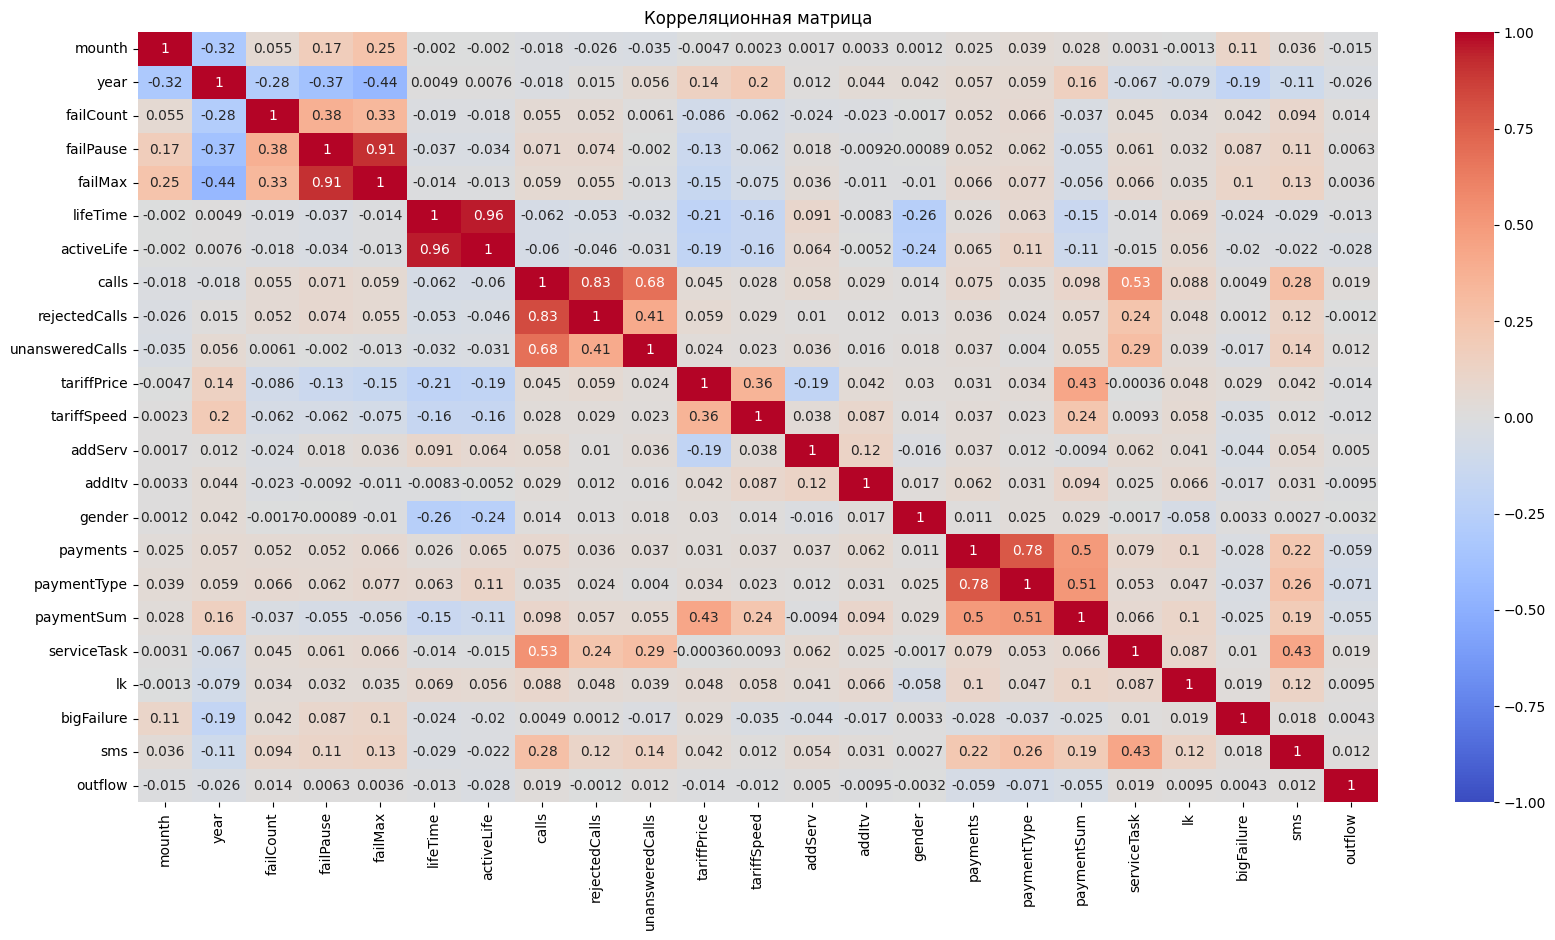

In [13]:
corr = df.corr()

# Построение тепловой карты
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

In [14]:
def normalize(group, columns):
    for col in columns:
        X_min = group[col].min()
        X_max = group[col].max()
        # Защита от деления на ноль
        range_span = X_max - X_min
        if range_span == 0:
            group[f'{col}_n'] = 0
        else:
            group[f'{col}_n'] = (group[col] - X_min) / range_span
    return group

# Укажите колонки для нормализации
# columns_to_normalize = ['paymentSum', 'tariffPrice', 'tariffSpeed']
columns_to_normalize = ['lifeTime', 'activeLife']


# Применяем нормализацию по месяцам
df1 = df1.groupby('mounth', group_keys=False).apply(normalize, columns=columns_to_normalize)
df2 = df2.groupby('mounth', group_keys=False).apply(normalize, columns=columns_to_normalize)
df1


NameError: name 'df1' is not defined

In [15]:
# df_test['day'] = 1
# df_test.head()
df_datetime['day'] = 1
df_datetime.head()

,login,mounth,year,failCount,failPause,failMax,lifeTime,activeLife,calls,rejectedCalls,...,gender,payments,paymentType,paymentSum,serviceTask,lk,bigFailure,sms,outflow,day
0,afvpn3123,3,2021,3,29760,29460,75368162,72642553,0,0,...,1,2,6,1085,0,0,0,2,0,1
1,afvpn3331,3,2021,7,32820,30060,151481621,146966400,1,1,...,0,2,6,1300,0,0,0,2,0,1
2,afvpn3447,3,2021,1,360,360,99732809,55036800,0,0,...,1,0,0,0,0,0,0,0,0,1
3,afvpn3595,3,2021,3,51960,39160,154685621,155088000,3,1,...,1,2,6,1400,0,0,0,2,0,1
4,afvpn3615,3,2021,3,51900,39101,154690459,155088000,8,2,...,0,0,0,0,5,0,0,8,0,1


In [17]:
# df_test['datetime'] = pd.to_datetime(df_test[['year', 'month', 'day']])
# df_test.head()
df_datetime['datetime'] = pd.to_datetime(df_datetime[['year', 'month', 'day']])
df_datetime.head()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [ ]:
count_outflow_1 = df1[df1['outflow'] == 1]['payments'].count()
count_outflow_1

1439

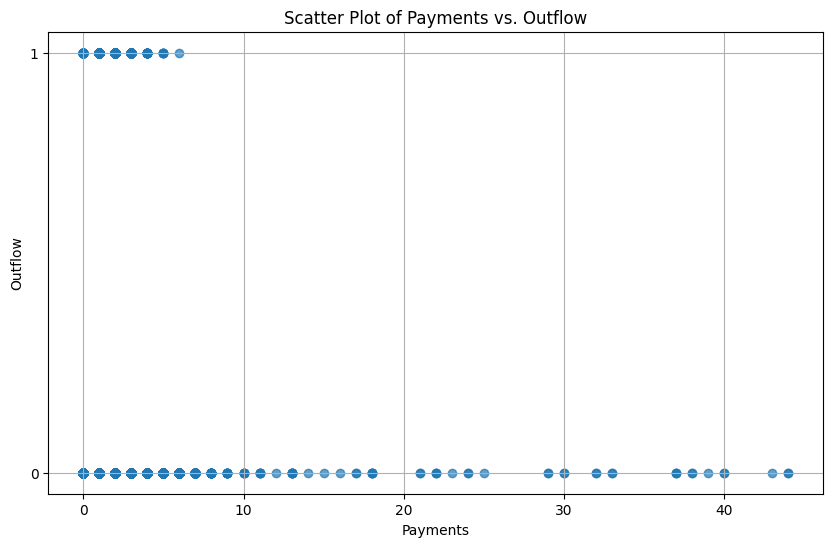

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['payments'], df1['outflow'], alpha=0.7)

# Настройка графика
plt.title('Scatter Plot of Payments vs. Outflow')
plt.xlabel('Payments')
plt.ylabel('Outflow')
plt.yticks([0, 1], ['0', '1'])
plt.grid(True)

# Показать график
plt.show()

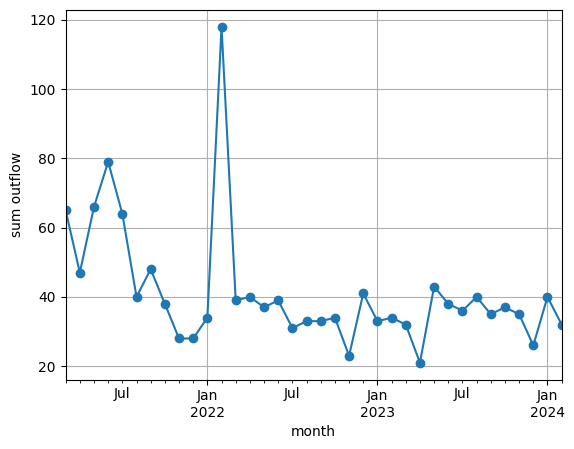

In [ ]:
avg_price_per_year = df_datetime.groupby('datetime')['outflow'].sum()
avg_price_per_year.plot(kind='line', marker='o')
plt.xlabel('month')
plt.ylabel('sum outflow')
plt.grid(True)
plt.show()

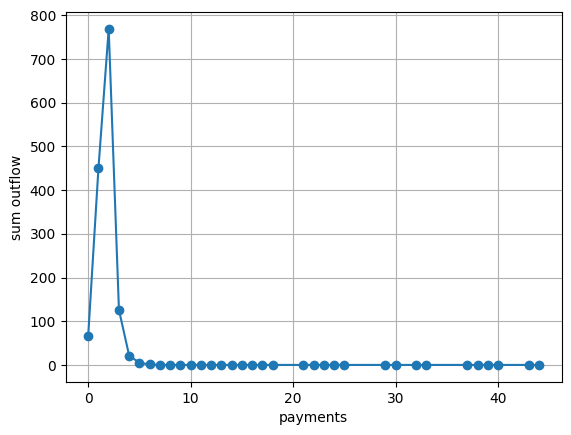

In [ ]:
avg_price_per_year = df1.groupby('outflow')['payments'].sum()
avg_price_per_year.plot(kind='line', marker='o')
plt.xlabel('outflow')
plt.ylabel('sum payments')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Равномерное распределение')

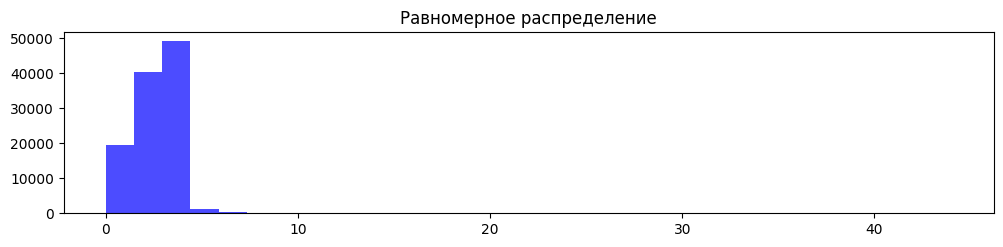

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(df1['payments'], bins=30, color='blue', alpha=0.7)
plt.title('Равномерное распределение')

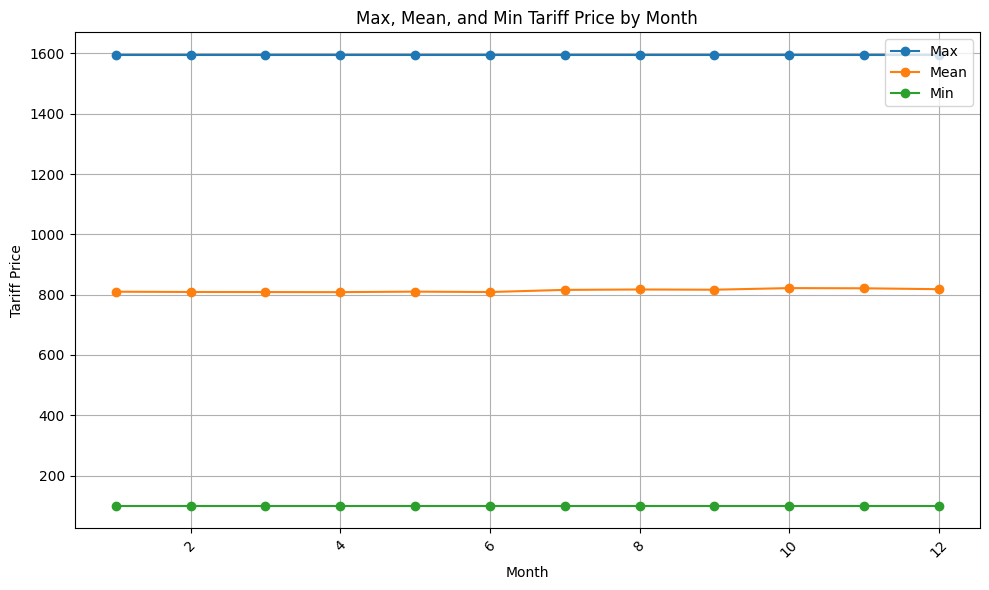

In [ ]:
price_stats = df1.groupby('datetime')['tariffPrice'].agg(['max', 'mean', 'min'])

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_stats.index, price_stats['max'], marker='o', label='Max')
plt.plot(price_stats.index, price_stats['mean'], marker='o', label='Mean')
plt.plot(price_stats.index, price_stats['min'], marker='o', label='Min')

# Настройка графика
plt.xlabel('Month')
plt.ylabel('Tariff Price')
plt.title('Max, Mean, and Min Tariff Price by Month')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Поворот подписей месяцев для удобства
plt.tight_layout()

# Отображение графика
plt.show()

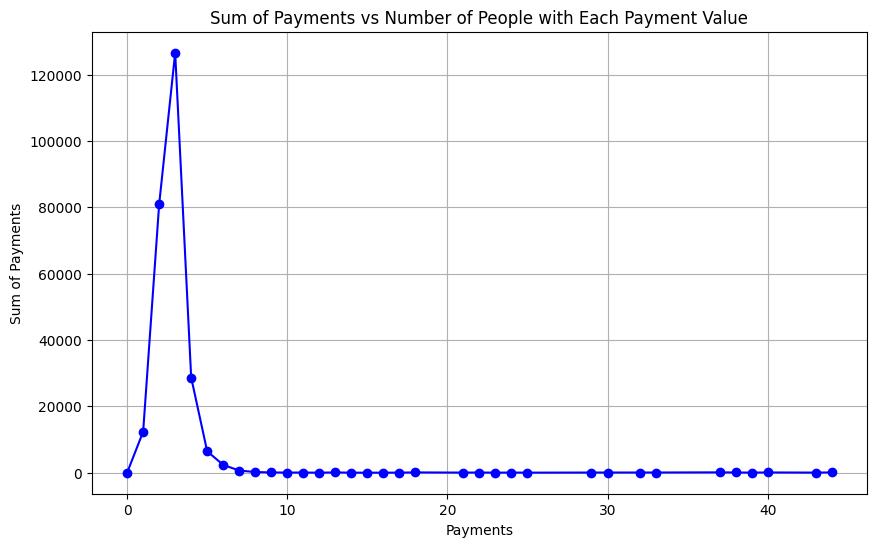

In [ ]:
payment_counts = df1['payments'].value_counts().sort_index()
payment_sums = df1.groupby('payments')['payments'].sum()
plt.figure(figsize=(10, 6))
plt.plot(payment_counts.index, payment_sums, marker='o', linestyle='-', color='b')
plt.xlabel('Payments')
plt.ylabel('Sum of Payments')
plt.grid(True)
plt.title('Sum of Payments vs Number of People with Each Payment Value')
plt.show()

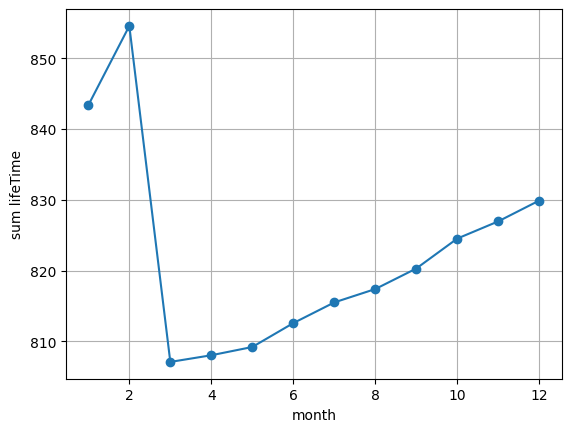

In [ ]:
avg_price_per_year = df.groupby('mounth')['tariffPrice'].mean()
avg_price_per_year.plot(kind='line', marker='o')
plt.xlabel('month')
plt.ylabel('sum lifeTime')
plt.grid(True)
plt.show()

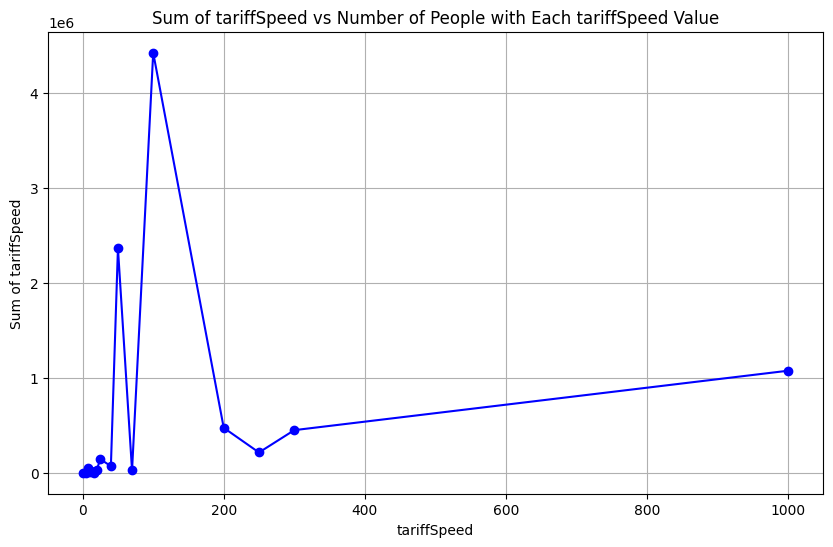

In [ ]:
payment_counts = df['tariffSpeed'].value_counts().sort_index()
payment_sums = df.groupby('tariffSpeed')['tariffSpeed'].sum()
plt.figure(figsize=(10, 6))
plt.plot(payment_counts.index, payment_sums, marker='o', linestyle='-', color='b')
plt.xlabel('tariffSpeed')
plt.ylabel('Sum of tariffSpeed')
plt.grid(True)
plt.title('Sum of tariffSpeed vs Number of People with Each tariffSpeed Value')
plt.show()

In [ ]:
df1['activeTime_n/lifeTime_n'] = df1['activeLife_n'] / df1['lifeTime_n']
df2['activeTime_n/lifeTime_n'] = df2['activeLife_n'] / df2['lifeTime_n']

# df1['failCount/activeLife'] = df1['failCount'] / df1['activeLife']
# df2['failCount/activeLife'] = df2['failCount'] / df2['activeLife']


# df1['rejectedCalls/calls'] = np.where(df1['calls'] == 0, 0, df1['rejectedCalls'] / df1['calls'])
# df2['rejectedCalls/calls'] = np.where(df2['calls'] == 0, 0, df2['rejectedCalls'] / df2['calls'])

# df1['unansweredCalls/calls'] = np.where(df1['calls'] == 0, 0, df1['unansweredCalls'] / df1['calls'])
# df2['unansweredCalls/calls'] = np.where(df2['calls'] == 0, 0, df2['unansweredCalls'] / df2['calls'])

df1


,mounth,failCount,failPause,failMax,calls,addServ,addItv,gender,serviceTask,lk,...,sms,outflow,tariffPrice_n,tariffSpeed_n,failCount/activeLife,rejectedCalls/calls,unansweredCalls/calls,lifeTime_n,activeLife_n,activeTime_n/lifeTime_n
0,3,3,29760,29460,0,0,0,1,0,0,...,2,0,0.367893,0.039039,4.129811e-08,0.000000,0.000000,0.194046,0.187798,0.967799
1,3,7,32820,30060,1,0,0,0,0,0,...,2,0,0.367893,0.099099,4.762993e-08,1.000000,0.000000,0.390236,0.379942,0.973620
2,3,1,360,360,0,0,0,1,0,0,...,0,0,0.501672,0.007007,1.816966e-08,0.000000,0.000000,0.256849,0.142283,0.553956
3,3,3,51960,39160,3,0,0,1,0,0,...,2,0,0.501672,0.007007,1.934386e-08,0.333333,0.333333,0.398495,0.400938,1.006131
4,3,3,51900,39101,8,0,0,0,5,0,...,8,0,0.501672,0.007007,1.934386e-08,0.250000,0.125000,0.398507,0.400938,1.006100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111225,12,0,0,0,4,1,0,0,1,0,...,0,0,0.521739,0.049049,0.000000e+00,0.250000,0.250000,0.924279,0.810044,0.876406
111226,12,8,62280,43380,7,1,0,0,2,0,...,3,0,0.267559,0.049049,2.237617e-08,0.142857,0.714286,0.903501,0.870608,0.963593
111227,12,9,56432,46532,0,0,0,0,0,0,...,3,0,0.367893,0.099099,3.590716e-08,0.000000,0.000000,0.603277,0.610351,1.011727
111228,12,3,9277,7957,0,1,0,0,1,0,...,3,0,0.595318,0.049049,2.175578e-08,0.000000,0.000000,0.335112,0.335788,1.002016


In [ ]:
df1.nunique()

mounth                12
failCount            130
failPause           6290
failMax             4264
lifeTime           56644
activeLife         24984
calls                 60
rejectedCalls         47
unansweredCalls       23
addServ                2
addItv                 2
gender                 2
payments              34
serviceTask           14
lk                    56
bigFailure            18
sms                   28
outflow                2
paymentSum_n       12756
tariffPrice_n         36
tariffSpeed_n         17
dtype: int64

In [ ]:
# df1 = df1.drop(['paymentSum', 'tariffPrice', 'tariffSpeed'], axis=1)
# df2 = df2.drop(['paymentSum', 'tariffPrice', 'tariffSpeed'], axis=1)
# df1 = df1.drop(['paymentSum_n'], axis=1)
# df2 = df2.drop(['paymentSum_n'], axis=1)

df1


KeyError: "['paymentSum_n'] not found in axis"

In [ ]:
# df1 = df1.drop(['year', 'day', 'datetime'], axis=1)
# df2 = df2.drop(['year', 'day', 'datetime'], axis=1)

df1 = df1.drop(['rejectedCalls'], axis=1)
df2 = df2.drop(['rejectedCalls'], axis=1)


df1


,mounth,failCount,failPause,failMax,calls,addServ,addItv,gender,serviceTask,lk,bigFailure,sms,outflow,tariffPrice_n,tariffSpeed_n,failCount/activeLife,rejectedCalls/calls,unansweredCalls/calls,lifeTime_n,activeLife_n
0,3,3,29760,29460,0,0,0,1,0,0,0,2,0,0.367893,0.039039,4.129811e-08,0.000000,0.000000,0.194046,0.187798
1,3,7,32820,30060,1,0,0,0,0,0,0,2,0,0.367893,0.099099,4.762993e-08,1.000000,0.000000,0.390236,0.379942
2,3,1,360,360,0,0,0,1,0,0,0,0,0,0.501672,0.007007,1.816966e-08,0.000000,0.000000,0.256849,0.142283
3,3,3,51960,39160,3,0,0,1,0,0,0,2,0,0.501672,0.007007,1.934386e-08,0.333333,0.333333,0.398495,0.400938
4,3,3,51900,39101,8,0,0,0,5,0,0,8,0,0.501672,0.007007,1.934386e-08,0.250000,0.125000,0.398507,0.400938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111225,12,0,0,0,4,1,0,0,1,0,0,0,0,0.521739,0.049049,0.000000e+00,0.250000,0.250000,0.924279,0.810044
111226,12,8,62280,43380,7,1,0,0,2,0,0,3,0,0.267559,0.049049,2.237617e-08,0.142857,0.714286,0.903501,0.870608
111227,12,9,56432,46532,0,0,0,0,0,0,0,3,0,0.367893,0.099099,3.590716e-08,0.000000,0.000000,0.603277,0.610351
111228,12,3,9277,7957,0,1,0,0,1,0,2,3,0,0.595318,0.049049,2.175578e-08,0.000000,0.000000,0.335112,0.335788


In [ ]:
X = df.drop('outflow', axis=1).values
y = df['outflow'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
X_train = df1.drop('outflow', axis=1)
X_test = df2.drop('outflow', axis=1)
y_train = df1['outflow']
y_test = df2['outflow']

X_train


,mounth,failCount,failPause,failMax,calls,addServ,addItv,gender,serviceTask,lk,bigFailure,sms,tariffPrice_n,tariffSpeed_n,failCount/activeLife,rejectedCalls/calls,unansweredCalls/calls,lifeTime_n,activeLife_n,activeTime_n/lifeTime_n
0,3,3,29760,29460,0,0,0,1,0,0,0,2,0.367893,0.039039,4.129811e-08,0.000000,0.000000,0.194046,0.187798,0.967799
1,3,7,32820,30060,1,0,0,0,0,0,0,2,0.367893,0.099099,4.762993e-08,1.000000,0.000000,0.390236,0.379942,0.973620
2,3,1,360,360,0,0,0,1,0,0,0,0,0.501672,0.007007,1.816966e-08,0.000000,0.000000,0.256849,0.142283,0.553956
3,3,3,51960,39160,3,0,0,1,0,0,0,2,0.501672,0.007007,1.934386e-08,0.333333,0.333333,0.398495,0.400938,1.006131
4,3,3,51900,39101,8,0,0,0,5,0,0,8,0.501672,0.007007,1.934386e-08,0.250000,0.125000,0.398507,0.400938,1.006100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111225,12,0,0,0,4,1,0,0,1,0,0,0,0.521739,0.049049,0.000000e+00,0.250000,0.250000,0.924279,0.810044,0.876406
111226,12,8,62280,43380,7,1,0,0,2,0,0,3,0.267559,0.049049,2.237617e-08,0.142857,0.714286,0.903501,0.870608,0.963593
111227,12,9,56432,46532,0,0,0,0,0,0,0,3,0.367893,0.099099,3.590716e-08,0.000000,0.000000,0.603277,0.610351,1.011727
111228,12,3,9277,7957,0,1,0,0,1,0,2,3,0.595318,0.049049,2.175578e-08,0.000000,0.000000,0.335112,0.335788,1.002016


In [ ]:
train_data = Pool(X_train, y_train)
test_data = Pool(X_test, y_test)

In [ ]:
model = CatBoostClassifier(#class_weights=[1, 10],
                           auto_class_weights="SqrtBalanced",
                           learning_rate=0.1,
                           eval_metric='F1',
                           iterations=5000,
                           depth=3) 

model.fit(
    train_data, 
    eval_set=test_data)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 28.6ms	remaining: 2m 23s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 54.2ms	remaining: 2m 15s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 79.6ms	remaining: 2m 12s
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 106ms	remaining: 2m 11s
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 130ms	remaining: 2m 10s
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 155ms	remaining: 2m 8s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 172ms	remaining: 2m 2s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 194ms	remaining: 2m 1s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 222ms	remaining: 2m 2s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 243ms	remaining: 2m 1s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 267ms	remaining: 2m
11:	learn: 0.0000000	test: 0.0000000	best: 0.000

Text(0.5, 1.0, 'Feature Importance')

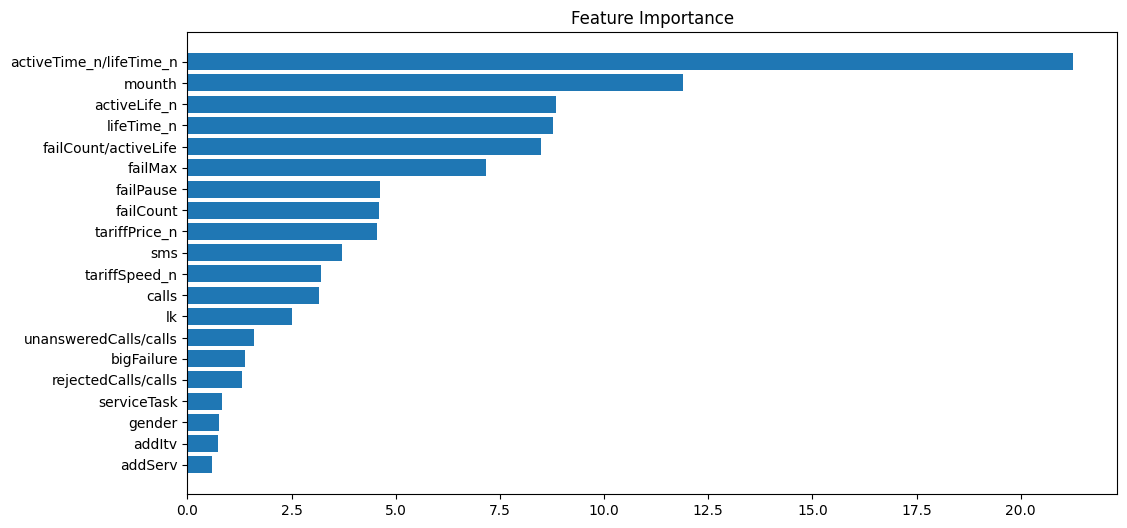

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
# Предсказание классов
predictions = model.predict(X_test)
print("Predicted classes:", predictions)

# Предсказание вероятностей
probabilities = model.predict_proba(X_test)
print("Predicted probabilities:", probabilities)

Predicted classes: [0 1 1 ... 0 0 0]
Predicted probabilities: [[0.68345182 0.31654818]
 [0.49726735 0.50273265]
 [0.42259328 0.57740672]
 ...
 [0.78713239 0.21286761]
 [0.74108735 0.25891265]
 [0.80348652 0.19651348]]


In [ ]:
probabilities[:,1]

array([0.31654818, 0.50273265, 0.57740672, ..., 0.21286761, 0.25891265,
       0.19651348])

/home/leo/Documents/Projects/machine_learning_fridom/.venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


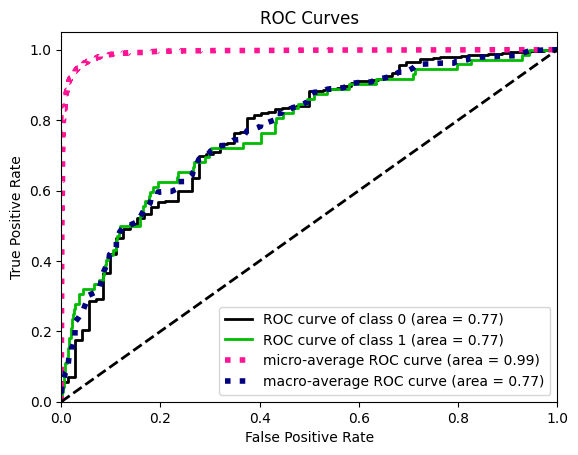

In [ ]:
y_true = y_test
y_probas = probabilities
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()